In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats.kde import gaussian_kde

In [11]:
class My_kernel(object):
  
  def __init__(self,Data,h):
    self.Data = Data
    self.n = len(Data)
    self.h = h

  def kernel(self,x):
    return np.exp((- x**2) / 2) / (2 * np.pi)**(1/2)

  def p(self,x):
    X = np.ones(self.n)
    return self.kernel((x - self.Data)/self.h).sum() / (self.n*self.h)


In [4]:
class Gaussian(object):

  def __init__(self,x,M1,S1,M2,S2):
    self.G1 = stats.norm.pdf(x, M1, S1)
    self.M1 = M1
    self.S1 = S1
    self.G2 = stats.norm.pdf(x, M2, S2)
    self.M2 = M2
    self.S2 = S2

  def mix_G(self,x):
    return (0.4 * self.G1 + 0.6 * self.G2)

  def mix_G_distribution(self):
    ratio = 0.4
    if np.random.rand() < ratio:
      return np.random.normal(self.M1, self.S1)
    else:
      return np.random.normal(self.M2, self.S2)


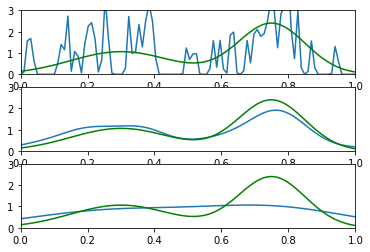

In [12]:
x = np.linspace(0,1,100)
M1 = 0.3
S1 = 0.15
M2 = 0.75
S2 = 0.1

model = Gaussian(x,M1,S1,M2,S2)
N = 50
Data = np.array([model.mix_G_distribution() for n in range(N)])
h_list = [0.005, 0.07, 0.2]

plt.title("Figure 2.25")
for i,h in enumerate(h_list):
  K = My_kernel(Data, h)
  my_gaussian_kde = np.vectorize(K.p)(x)

  plt.subplot(3,1,i+1)
  plt.plot(x, my_gaussian_kde)
  plt.plot(x,model.mix_G(x), "g-")
  plt.xlim(0, 1)
  plt.ylim(0, 3)


plt.show()

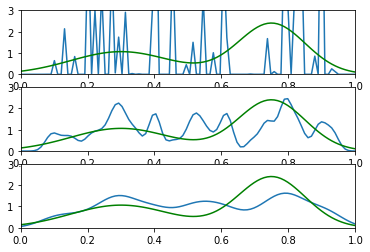

In [10]:
x = np.linspace(0,1,100)
M1 = 0.3
S1 = 0.15
M2 = 0.75
S2 = 0.1

model = Gaussian(x,M1,S1,M2,S2)
N = 50
Data = np.array([model.mix_G_distribution() for n in range(N)])
h_list = [0.005, 0.07, 0.2]

plt.title("Figure 2.25")
for i,h in enumerate(h_list):
  K = My_kernel(Data, h)
  my_gaussian_kde = np.vectorize(K.p)(x)

  plt.subplot(3,1,i+1)
  plt.plot(x, gaussian_kde(Data,h)(x))
  plt.plot(x,model.mix_G(x), "g-")
  plt.xlim(0, 1)
  plt.ylim(0, 3)


plt.show()